Dataset shape: (200, 5)
Column names: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Data types: CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
First 5 rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Last 5 rows:
      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126      

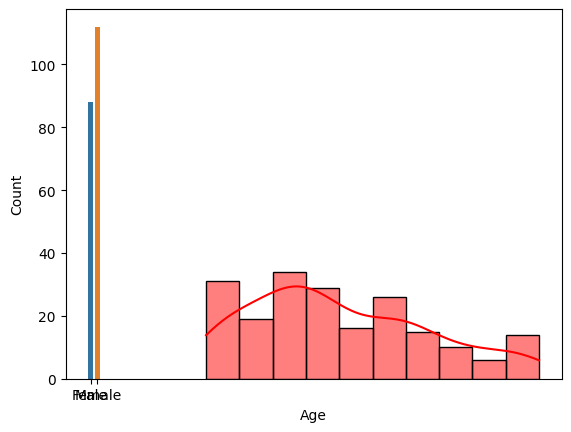

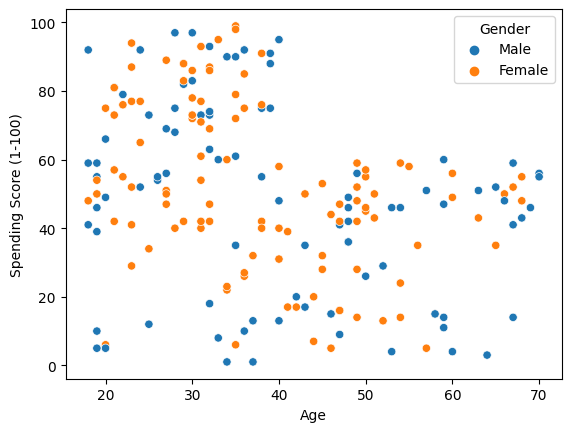

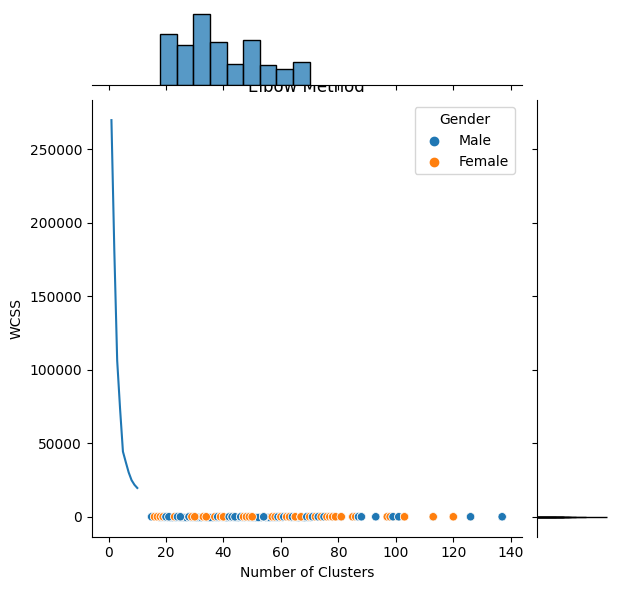

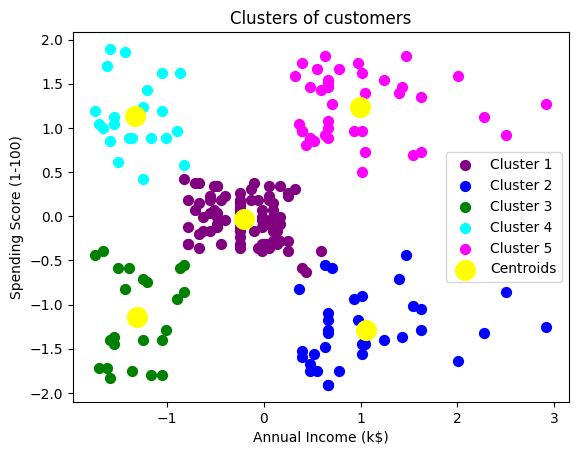

0    81
4    39
1    35
2    23
3    22
Name: Cluster, dtype: int64
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        164.371429  41.114286           88.200000               17.114286
2         23.000000  45.217391           26.304348               20.913043
3         23.090909  25.272727           25.727273               79.363636
4        162.000000  32.692308           86.538462               82.128205


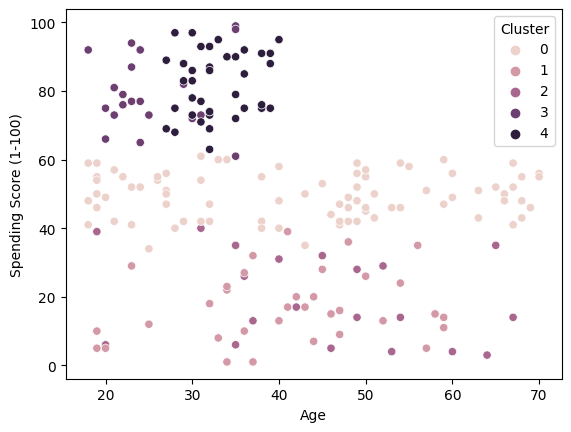

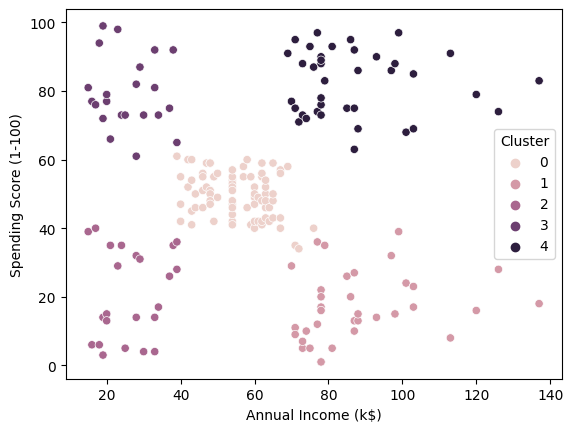

In [8]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset
df = pd.read_csv("Mall_Customers.csv")

# **Exploring the dataset**
# Returns number of rows and columns of the dataset
print("Dataset shape:", df.shape)

# Returns an object with all of the column headers 
print("Column names:", df.columns)

# Returns different datatypes for each column
print("Data types:", df.dtypes)

# Returns the first 5 rows
print("First 5 rows:\n", df.head())

# Returns the last 5 rows
print("Last 5 rows:\n", df.tail())

# Returns basic information on all columns
print("Dataset information:")
df.info()

# Returns basic statistics on numeric columns
print("Descriptive statistics:")
print(df.describe())

# Returns true for a column having null values, else false
print("Columns with null values:")
print(df.isnull().any())

# **Data Cleaning**
# Creating a copy of dataset
df_copy = df.copy()

# Dropping the 'CustomerID' column
df_copy.drop('CustomerID', axis=1, inplace=True)

# **Data Visualization**
## Gender Plot
sns.countplot(data=df_copy, x='Gender')

## Age Plot
# Visualising the 'Age' column using Histogram
sns.histplot(data=df_copy, x='Age', bins=10, kde=True, color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Age Vs Spending Score
# Visualising the 'Age' and 'Spending Score (1-100)' columns using Scatterplot and Jointplot
sns.scatterplot(data=df_copy, x='Age', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df_copy, x='Age', y='Spending Score (1-100)', kind='scatter')

## Annual Income Vs Spending Score
sns.scatterplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

# **Data Preprocessing**
# Selecting 'Annual Income' and 'Spending Score' as the features for clustering
X = df_copy.iloc[:, [2,3]]

## Finding optimal number of clusters using Elbow Method
wcss = []
for i in range(1,11):
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_model.fit(X)
    wcss.append(kmeans_model.inertia_)

# Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# **Feature Scaling**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Model Building**
# Training the KMeans model with n_clusters=5
# Training the KMeans model with n_clusters=5 and n_init=10
kmeans_model = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans_model.fit_predict(X_scaled)  # set n_init explicitly to 10

# Visualising the clusters
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
#Cluster Analysis
#Adding a new column 'Cluster' to the original dataset
df['Cluster'] = y_kmeans
#Checking the number of customers in each cluster
print(df['Cluster'].value_counts())
#Grouping the dataset by 'Cluster' column and finding the mean of each feature
print(df.groupby('Cluster').mean())

#Visualising the clusters based on 'Age' and 'Spending Score'
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster')
plt.show()

#Visualising the clusters based on 'Annual Income' and 'Spending Score'
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
plt.show()